# **Topology Network**

This file contains all code necessary to analyze network topology exported from Cytoscape. The main goal of this code is to identify novel candidate genes for downstream analysis with Xenium. The input consists of subnetworks containing all hubs from communities that show overlap with the Xenium Immuno-Oncology panel.

In [2]:
# Import topology file
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2 
from matplotlib_venn import venn3

In [3]:
# Read file
topology_df = pd.read_csv('subnetwork_topology_fa_hnscc.csv')
topology_df.head()

,AverageShortestPathLength,baseMean,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,gene_id,IsSingleNode,lfcSE,...,padj,PartnerOfMultiEdgedNodePairs,pvalue,Radiality,selected,SelfLoops,shared name,stat,Stress,TopologicalCoefficient
0,2.480287,782.257815,0.005637,0.403179,0.404412,17,6,23411,False,0.225845,...,0.004118,0,0.001214,0.976124,False,0,SIRT1,3.235646,5284,0.176850
1,2.505376,1814.081858,0.008189,0.399142,0.382353,17,6,6198,False,0.183896,...,0.000044,0,0.000007,0.975720,False,0,RPS6KB1,4.490732,6416,0.154799
2,2.598566,1566.630621,0.011362,0.384828,0.802139,34,6,6790,False,0.293204,...,0.000227,0,0.000044,0.974217,False,0,AURKA,4.082955,8838,0.272888
3,2.860215,1540.769520,0.000322,0.349624,0.885918,34,6,9787,False,0.308951,...,0.000239,0,0.000047,0.969997,False,0,DLGAP5,4.068317,632,0.377293
4,2.853047,1596.152855,0.000649,0.350503,0.853782,35,6,64151,False,0.287690,...,0.001122,0,0.000274,0.970112,False,0,NCAPG,3.638941,1070,0.377880


In [4]:
# Show columns names
topology_df.columns.tolist()

['AverageShortestPathLength',
 'baseMean',
 'BetweennessCentrality',
 'ClosenessCentrality',
 'ClusteringCoefficient',
 'Degree',
 'Eccentricity',
 'gene_id',
 'IsSingleNode',
 'lfcSE',
 'log2FoldChange',
 'name',
 'NeighborhoodConnectivity',
 'NumberOfDirectedEdges',
 'NumberOfUndirectedEdges',
 'padj',
 'PartnerOfMultiEdgedNodePairs',
 'pvalue',
 'Radiality',
 'selected',
 'SelfLoops',
 'shared name',
 'stat',
 'Stress',
 'TopologicalCoefficient']

In [5]:
# Order by degree and show top genes
top_degree = topology_df.sort_values(by='Degree', ascending=False).head(30)
# Only show Gene and Degree columns
top_degree[['name', 'Degree']]

,name,Degree
60,EGFR,62
234,BRCA1,58
176,PTEN,57
146,EXO1,56
208,CDK1,51
111,HSP90AA1,48
64,ATM,47
223,CHEK1,47
265,CCNA2,45
229,TOP2A,42


In [6]:
# Top genes by degree
genes_degree = top_degree['name'].tolist()
print(f"Number of top genes by degree: {len(genes_degree)}")

Number of top genes by degree: 30


In [7]:
# Order by Betweenness and show top genes
top_betweenness = topology_df.sort_values(by='BetweennessCentrality', 
                                          ascending=False).head(30)
# Only show Gene and Betweenness columns
top_betweenness[['name', 'BetweennessCentrality']]

,name,BetweennessCentrality
60,EGFR,0.148334
234,BRCA1,0.119658
176,PTEN,0.116921
111,HSP90AA1,0.084228
208,CDK1,0.083229
267,ACACA,0.075070
6,KRAS,0.074480
72,PPARG,0.073837
64,ATM,0.042284
211,ITGB1,0.041236


In [8]:
# Top genes by betweenness
genes_betweenness = top_betweenness['name'].tolist()
print(f"Number of top genes by betweenness: {len(genes_betweenness)}")

Number of top genes by betweenness: 30


In [9]:
# Order by expression and show top genes
top_expression = topology_df.sort_values(by='log2FoldChange', 
                                          ascending=False).head(30)
# Only show Gene and Betweenness columns
top_expression[['name', 'log2FoldChange']]

,name,log2FoldChange
104,GCSH,6.866044
276,CYP3A4,5.764849
75,BIRC3,5.214266
255,GATC,4.408387
175,CYP4A22,4.397079
215,HMGCLL1,3.754804
61,SLC10A1,3.752675
155,CYP4A11,3.463009
277,CYP19A1,3.395284
105,DMGDH,3.254416


In [10]:
# Top genes by dexpression
genes_expression = top_expression['name'].tolist()
print(f"Number of top genes by expression: {len(genes_expression)}")

Number of top genes by expression: 30


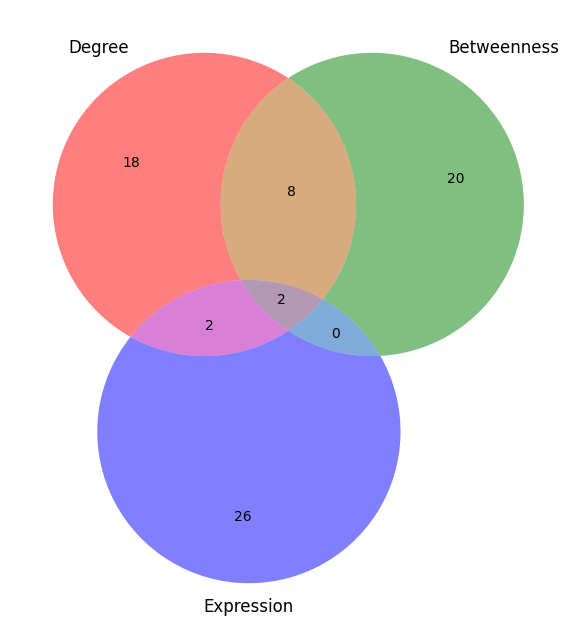

In [12]:
# Make list to contains 
set1 = set(genes_degree)
set2 = set(genes_betweenness)
set3 = set(genes_expression)

# PLot Venn diagram
plt.figure(figsize=(8,8))
venn3([set1, set2, set3], set_labels=('Degree', 'Betweenness', 'Expression'), alpha=0.5)

# Show plot
# Save Plot
plt.savefig("venn3_hubs_fa_hnscc_degree_betweenness_xenium.png", dpi=900)
#plt.title("Intersection of genes between the two methodologies and antibodies")
plt.show()

In [30]:
# Print intersections
print("Intersection between Degree and Betweenness genes:", set1.intersection(set2))
print("Intersection between Degree and Expression genes:", set1.intersection(set3))
print("Intersection between Betweenness and Expression genes:", set2.intersection(set3))
print("Intersection between the three sets:", set1.intersection(set2).intersection(set3))

Intersection between Degree and Betweenness genes: {'HSP90AA1', 'PIK3CA', 'BRCA1', 'KRAS', 'PTEN', 'EGFR', 'CHEK1', 'BRCA2', 'ATM', 'CDK1'}
Intersection between Degree and Expression genes: {'BRCA2', 'EGFR', 'CENPE', 'ASPM'}
Intersection between Betweenness and Expression genes: {'EGFR', 'BRCA2'}
Intersection between the three sets: {'EGFR', 'BRCA2'}
